In [209]:
#importing pandas , numpy , matplotlib and sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math
import statistics

In [2]:
#reading the CSV for the water project CDF expenditure
df=pd.read_csv("C:\\Users\\ckbosire\\Downloads\\CDF_Water_Sector.csv")

In [3]:
#checking a sampled output of the dataframe
df.sample(5)

,objectid,index_,county,district,constituency,project_name,location,sector,mtfe_sector,econ1,...,f2004_2005,f2005_2006,f2006_2007,f2007_2008,f2008_2009,f2009_2010,total_amount,prox2,y,x
4753,3443,29848,Baringo,Baringo,Baringo Central,Kaptorokwo community Water project,Kituro,water,"Environment, water and irrigation",Capital,...,0,0,0,0,700000,1500000,2200000,2,0.476509,35.805411
403,404,3289,Murang'a,Maragua,Maragua,Ngaburi Kenyekini Water Project,Nginda,Water,"Environment, water and irrigation",Capital,...,0,0,0,150000,0,0,150000,2,-0.779148,37.017411
4395,3085,25369,Kisumu,Nyando,Muhoroni,Geno Community Water Project,Nyangoma,Water,"Environment, water and irrigation",Capital,...,0,0,0,0,0,200000,200000,2,-0.128461,35.067151
1426,2427,17149,Meru,Meru North,Igembe South,Itwe Water Project,Antubeiga,Water,"Environment, water and irrigation",Capital,...,0,250000,0,0,0,0,250000,2,0.276333,37.927279
2620,1621,13232,Machakos,Machakos,Mwala,Mululini Dam,Wamunyu,Water,"Environment, water and irrigation",Capital,...,0,0,0,100000,0,0,100000,2,-1.364299,37.570962


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5311 entries, 0 to 5310
Data columns (total 27 columns):
objectid                 5311 non-null int64
index_                   5311 non-null int64
county                   5311 non-null object
district                 5311 non-null object
constituency             5311 non-null object
project_name             5311 non-null object
location                 5311 non-null object
sector                   5311 non-null object
mtfe_sector              5231 non-null object
econ1                    5311 non-null object
econ2                    5311 non-null object
activity_to_bedone       5007 non-null object
expected_output          4694 non-null object
implementation_status    5013 non-null object
remarks                  2711 non-null object
estimated_cost           5143 non-null float64
f2003_2004               5311 non-null int64
f2004_2005               5311 non-null int64
f2005_2006               5311 non-null int64
f2006_2007             

In [5]:
#dataset descriptive statistics
df.describe()

,objectid,index_,estimated_cost,f2003_2004,f2004_2005,f2005_2006,f2006_2007,f2007_2008,f2008_2009,f2009_2010,total_amount,prox2,y,x
count,5311.000000,5311.000000,5.143000e+03,5.311000e+03,5.311000e+03,5.311000e+03,5.311000e+03,5.311000e+03,5.311000e+03,5.311000e+03,5.311000e+03,5311.000000,5311.000000,5311.000000
mean,2656.000000,22983.117115,1.739608e+06,2.924478e+04,1.122697e+05,1.341423e+05,1.783387e+05,1.493181e+05,1.070599e+05,8.661393e+04,7.969641e+05,1.999812,-0.463351,36.583890
std,1533.297971,14421.252580,1.293076e+07,1.601631e+05,3.927434e+05,3.813309e+05,5.354036e+05,4.292709e+05,3.872289e+05,4.906056e+05,1.272983e+06,0.013722,1.337374,1.576573
min,1.000000,12.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-4.573497,33.990649
25%,1328.500000,12012.000000,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+05,2.000000,-1.111534,35.100906
50%,2656.000000,19455.000000,4.500000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+05,2.000000,-0.439739,36.879749
75%,3983.500000,35024.500000,1.100000e+06,0.000000e+00,0.000000e+00,5.000000e+04,1.500000e+05,1.000000e+05,0.000000e+00,0.000000e+00,1.000000e+06,2.000000,0.243764,37.635233
max,5311.000000,50889.000000,6.520000e+08,3.000000e+06,8.000000e+06,6.000000e+06,2.000000e+07,1.000000e+07,8.681282e+06,1.657826e+07,2.600000e+07,2.000000,4.580726,41.767246


In [6]:
#checking for null values
df.isna().sum()


objectid                    0
index_                      0
county                      0
district                    0
constituency                0
project_name                0
location                    0
sector                      0
mtfe_sector                80
econ1                       0
econ2                       0
activity_to_bedone        304
expected_output           617
implementation_status     298
remarks                  2600
estimated_cost            168
f2003_2004                  0
f2004_2005                  0
f2005_2006                  0
f2006_2007                  0
f2007_2008                  0
f2008_2009                  0
f2009_2010                  0
total_amount                0
prox2                       0
y                           0
x                           0
dtype: int64

In [7]:
#checking the data types in the dataset
df.dtypes

objectid                   int64
index_                     int64
county                    object
district                  object
constituency              object
project_name              object
location                  object
sector                    object
mtfe_sector               object
econ1                     object
econ2                     object
activity_to_bedone        object
expected_output           object
implementation_status     object
remarks                   object
estimated_cost           float64
f2003_2004                 int64
f2004_2005                 int64
f2005_2006                 int64
f2006_2007                 int64
f2007_2008                 int64
f2008_2009                 int64
f2009_2010                 int64
total_amount               int64
prox2                      int64
y                        float64
x                        float64
dtype: object

In [8]:
#checking the columns in the data set
df.columns

Index(['objectid', 'index_', 'county', 'district', 'constituency',
       'project_name', 'location', 'sector', 'mtfe_sector', 'econ1', 'econ2',
       'activity_to_bedone', 'expected_output', 'implementation_status',
       'remarks', 'estimated_cost', 'f2003_2004', 'f2004_2005', 'f2005_2006',
       'f2006_2007', 'f2007_2008', 'f2008_2009', 'f2009_2010', 'total_amount',
       'prox2', 'y', 'x'],
      dtype='object')

In [9]:
df.mtfe_sector.unique()

array(['Environment, water and irrigation', nan], dtype=object)

In [10]:
df.sector.value_counts()

Water    4401
water     910
Name: sector, dtype: int64

In [11]:
df.location.unique()

array(['Komothai', 'Ikinu', 'Githiga', ..., 'Tigithi', 'Nyahururu',
       'Kinamba'], dtype=object)

In [12]:
pd.get_option('display.max_columns')

20

In [13]:
#setting the display value 
pd.set_option('display.max_columns',200)

In [14]:
df.groupby(['county']).count()['project_name']

county
Baringo            166
Bomet               87
Bungoma            101
Busia              213
Embu               107
Garissa             20
Homa Bay           103
Isiolo              34
Kajiado            120
Kakamega           191
Kericho            140
Kiambu             177
Kilifi              80
Kirinyaga          144
Kisii              139
Kisumu             112
Kitui              184
Kwale               41
Laikipia            78
Lamu                23
Machakos           418
Makueni            337
Mandera             46
Marakwet_Elgeyo    101
Marsabit            98
Meru               488
Migori              83
Mombasa             43
Murang'a           155
Nairobi             12
Nakuru             173
Nandi               66
Narok               52
Nyamira             86
Nyandarua           62
Nyeri               88
Samburu             34
Siaya              111
Taita Taveta       126
Tana River          23
Tharaka Nithi       10
Trans Nzoia         52
Turkana             32
Uasi

In [16]:
df['cost']=df.f2003_2004+df.f2004_2005+df.f2005_2006+df.f2006_2007+df.f2007_2008+df.f2008_2009+df.f2009_2010


In [17]:
#inconsistecy in the data 
df[df['cost'] > df['total_amount']]

,objectid,index_,county,district,constituency,project_name,location,sector,mtfe_sector,econ1,econ2,activity_to_bedone,expected_output,implementation_status,remarks,estimated_cost,f2003_2004,f2004_2005,f2005_2006,f2006_2007,f2007_2008,f2008_2009,f2009_2010,total_amount,prox2,y,x,cost
5108,3798,33250,Kericho,Bureti,Buret,CHEBOIN W. SPRING,CHEBOIN,water,"Environment, water and irrigation",Capital,Capital,Protection of environment,Afforestation on water catchment areas,complete,NaN,NaN,0,0,0,0,0,123628,0,0,2,-0.539789,35.137407,123628


In [19]:
df.total_amount.max()

26000000

In [227]:
df.groupby(['total_amount']).head()[['county','total_amount']]


AttributeError: Cannot access callable attribute 'sample' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [23]:
df.expected_output.count()

4694

In [25]:
#replacing the value of implementation status to have a standard format
df['implementation_status'].replace(['Completed'],'complete',inplace=True)
df['implementation_status'].replace(['Complete'],'complete',inplace=True)
df['implementation_status'].replace(['Complete And In Use'],'complete',inplace=True)
df['implementation_status'].replace(['Complete & In Use'],'complete',inplace=True)
df['implementation_status'].replace(['Completed 100%'],'complete',inplace=True)
df['implementation_status'].replace(['Complete.'],'complete',inplace=True)
df['implementation_status'].replace(['Completed And In Use'],'complete',inplace=True)
df['implementation_status'].replace(['complete'],'complete',inplace=True)
df['implementation_status'].replace(['Complete & in use'],'complete',inplace=True)
df['implementation_status'].replace(['Phase I Complete'],'complete',inplace=True)
df['implementation_status'].replace(['Complete and in use.'],'complete',inplace=True)
df['implementation_status'].replace(['Complete & in use'],'complete',inplace=True)
df['implementation_status'].replace(['complete and in use'],'complete',inplace=True)
df['implementation_status'].replace(['Complete and in use.'],'complete',inplace=True)
df['implementation_status'].replace(['Reservoir complete'],'complete',inplace=True)
df['implementation_status'].replace(['Work Done To  Completion'],'complete',inplace=True)
df['implementation_status'].replace(['Complete and in use'],'complete',inplace=True)
df['implementation_status'].replace(['Complete & Operational'],'complete',inplace=True)
df['implementation_status'].replace(['Work Is Complete'],'complete',inplace=True)





df['implementation_status'].value_counts()

complete                                                                                                                                                                                          2035
Ongoing                                                                                                                                                                                            491
On Going                                                                                                                                                                                           290
New                                                                                                                                                                                                147
Stalled                                                                                                                                                                                            130
On-Go

In [26]:
df.shape

(5311, 28)

In [27]:
#filtering data on implemenation status
df.loc[(df.implementation_status=='complete') | (df.implementation_status=='stalled') | (df.implementation_status=='New')].implementation_status.value_counts()

complete    2035
New          147
stalled       10
Name: implementation_status, dtype: int64

In [28]:
#filtering data on implemenation status
df.loc[(df.implementation_status!='complete') & (df.implementation_status!='stalled') & (df.implementation_status!='New')].implementation_status.value_counts()

Ongoing                                                                491
On Going                                                               290
Stalled                                                                130
On-Going                                                               120
OnGoing                                                                 93
On going                                                                85
Not Started                                                             82
On-going                                                                41
Unknown                                                                 31
Laying Of Pipes Is Continuous                                           30
Phase I Not Complete                                                    29
1                                                                       29
,,                                                                      25
Incomplete               

In [30]:
df.implementation_status.isnull().sum()

298

In [31]:
df.implementation_status[df.implementation_status=='new']='New'

C:\Users\ckbosire\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df[df.implementation_status=='New']['implementation_status'].count()

148

In [33]:
df.implementation_status.value_counts()

complete                                                                                                                                                                                          2035
Ongoing                                                                                                                                                                                            491
On Going                                                                                                                                                                                           290
New                                                                                                                                                                                                148
Stalled                                                                                                                                                                                            130
On-Go

In [34]:
#filtering data on implementation status
df.loc[(df.implementation_status=='complete') | (df.implementation_status=='stalled') | (df.implementation_status=='unknown')].implementation_status.value_counts()

complete    2035
stalled       10
Name: implementation_status, dtype: int64

In [35]:
#cleaning data
df.implementation_status[df.implementation_status.isnull()]='unknown'

C:\Users\ckbosire\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
#cleanig data 
df.implementation_status[df.implementation_status=='Unknown']='unknown'

C:\Users\ckbosire\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
df

,objectid,index_,county,district,constituency,project_name,location,sector,mtfe_sector,econ1,econ2,activity_to_bedone,expected_output,implementation_status,remarks,estimated_cost,f2003_2004,f2004_2005,f2005_2006,f2006_2007,f2007_2008,f2008_2009,f2009_2010,total_amount,prox2,y,x,cost
0,1,12,Kiambu,Kiambu,Githunguri,Kiambururu Water Project,Komothai,Water,"Environment, water and irrigation",Capital,Capital,Borehole Drilling & Piping,A Borehole,Ongoing,Various facilities need renovation,3500000.0,0,1500000,0,1000000,0,0,1000000,3500000,2,-1.039600,36.833890,3500000
1,2,13,Kiambu,Kiambu,Githunguri,Thuita Water Project,Komothai,Water,"Environment, water and irrigation",Capital,Capital,"Borehole Drilling, Pump House Construction & P...",A Borehole & Clean Water To The Community,Ongoing,Project on use,5000000.0,0,750000,1070000,1000000,0,0,400000,3220000,2,-1.039600,36.833890,3220000
2,3,18,Kiambu,Kiambu,Githunguri,Ikinu-Rioki Wroject,Ikinu,Water,"Environment, water and irrigation",Capital,Capital,Borehole Drilling & Piping,Clean Water To Community,Ongoing,complete,4274000.0,0,1500000,150000,1000000,0,0,1000000,3650000,2,-1.103621,36.804585,3650000
3,4,33,Kiambu,Kiambu,Githunguri,Githiga Locproject,Githiga,Water,"Environment, water and irrigation",Capital,Capital,Technical Evaluation & Construction Of Intake ...,Intake Weir,Ongoing,Funds for wiring isuued and work is on,1500000.0,0,200000,0,300000,1500000,0,1000000,3000000,2,-1.073532,36.723872,3000000
4,5,36,Kiambu,Kiambu,Githunguri,Githunguri Loc Water Project,Githunguri,Water,"Environment, water and irrigation",Capital,Capital,"Purchase Of Pvc Pipes,Renovation Of Water Tanks",Provision Of Water,Ongoing,Project not complete,1500000.0,0,870000,0,0,0,0,0,870000,2,-1.071676,36.805700,870000
5,6,60,Kiambu,Kiambu,Githunguri,Kiratina Water Project,Kiratina,Water,"Environment, water and irrigation",Capital,Capital,"Pump House Construction,Pvc Pipes And Tank",Piped Water To Community,Ongoing,Insufficient funds were allocated,1050000.0,0,700000,0,0,0,0,1500000,2200000,2,-0.478146,37.126686,2200000
6,7,61,Kiambu,Kiambu,Githunguri,Kirigu Water Project,Kiratina,Water,"Environment, water and irrigation",Capital,Capital,Sinking Of Borehole,A Functional Borehole,Ongoing,Insufficient funds were allocated,1560000.0,0,300000,0,532737,0,0,500000,1332737,2,-0.478146,37.126686,1332737
7,8,97,Kiambu,Kiambu,Githunguri,Gichogocho Water Project,Kiratina,Water,"Environment, water and irrigation",Capital,Capital,"Construction Of Pump House,Intake Chamber & Pi...",Clean Water To Community,Not Yet Started,Completed and in use,10371831.0,0,0,0,2000000,0,0,0,2000000,2,-0.478146,37.126686,2000000
8,9,117,Kiambu,Kiambu,Githunguri,Ihiga-Gatitu-Ikinu Rioki Water project,Githiga,Water,"Environment, water and irrigation",Capital,Capital,Project design piping and expansion,Clean & piped water,Ongoing,NaN,2000000.0,0,0,0,0,2000000,1000000,0,3000000,2,-1.073532,36.723872,3000000
9,10,123,Kiambu,Kiambu,Githunguri,Kigumo Water,Kiratina,Water,"Environment, water and irrigation",Capital,Capital,Borehole cleanking tank repair and piping,Clean & piped water,Ongoing,NaN,760000.0,0,0,0,0,760000,0,0,760000,2,-0.478146,37.126686,760000


In [38]:
df.implementation_status[(df.implementation_status!='complete') & (df.implementation_status!='stalled') & (df.implementation_status!='New')]='ongoing'

C:\Users\ckbosire\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df.implementation_status.value_counts()

ongoing     3118
complete    2035
New          148
stalled       10
Name: implementation_status, dtype: int64

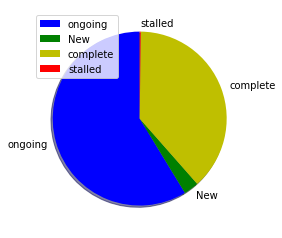

In [40]:
#ploting project implementation status
status=[3118,148,2035,10]
lbl=['ongoing','New','complete','stalled']
cols=['b','g','y','r']

plt.pie(status,labels=lbl,colors=cols,startangle=90,shadow=True)
plt.legend()

#plt.pie(status,labels=lbl,colors=cols,startangle=90,shadow=True,autopct='%1.1f%%')

In [41]:
#checking number of projects per county
df.county.value_counts()

Meru               488
Machakos           418
Makueni            337
Busia              213
Kakamega           191
Kitui              184
Kiambu             177
Nakuru             173
Baringo            166
Murang'a           155
Kirinyaga          144
Kericho            140
Kisii              139
Uasin Gishu        128
Taita Taveta       126
Kajiado            120
West Pokot         120
Kisumu             112
Siaya              111
Embu               107
Homa Bay           103
Bungoma            101
Marakwet_Elgeyo    101
Marsabit            98
Nyeri               88
Bomet               87
Nyamira             86
Migori              83
Kilifi              80
Laikipia            78
Wajir               74
Nandi               66
Nyandarua           62
Narok               52
Trans Nzoia         52
Mandera             46
Mombasa             43
Kwale               41
Samburu             34
Isiolo              34
Vihiga              33
Turkana             32
Tana River          23
Lamu       

In [42]:
#reading the population data set
df2=pd.read_csv("C:\\Users\\ckbosire\\Downloads\\population.csv")


df2.drop(3)

In [43]:
#dropping unwanted rows
df2.drop([0,1,2,50,51,52,53,54],inplace=True)


In [137]:
#sampling the population data set
df2.sample(5)

,county,Code,County_code,population_year_2009,population_year_2010,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
28,Trans Nzoia,26,KE26,"818,757","848,232","878,769","910,404","943,179","977,133","1,012,310","1,048,753","1,086,508","1,125,623","1,166,145"
24,Kiambu,22,KE22,"1,623,282","1,649,255","1,675,643","1,702,453","1,729,692","1,757,367","1,785,485","1,814,053","1,843,078","1,872,567","1,902,528"
42,Busia,40,KE40,"488,075","500,277","512,784","525,603","538,743","552,212","566,017","580,168","594,672","609,539","624,777"
49,Nairobi,47,KE47,"3,138,369","3,257,627","3,381,417","3,509,911","3,643,287","3,781,732","3,925,438","4,074,605","4,229,440","4,390,158","4,556,984"
33,Laikipia,31,KE31,"399,227","413,599","428,489","443,914","459,895","476,451","493,604","511,373","529,783","548,855","568,614"


In [45]:
df2.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Total ', ' ', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [138]:
#renaming columns
df2.rename(columns={'Unnamed: 0':'county','Unnamed: 1':'Code','Unnamed: 2':'County_code','Total ':'population_year_2009',' ':'population_year_2010'},inplace=True)
df2.sample()

,county,Code,County_code,population_year_2009,population_year_2010,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
29,Uasin Gishu,27,KE27,"894,179","926,369","959,719","994,269","1,030,062","1,067,145","1,105,562","1,145,362","1,186,595","1,229,312","1,273,568"


In [47]:
#merging the population data set to the CDF water expendirute data set
df3=pd.merge(df,df2,on='county')

In [48]:
#converting the population year 2009 to integer for manipulation
df3['population_year_2009']=df3.population_year_2009.str.replace(',','').astype(int)

In [49]:
#listing columns in the new data set
df3.columns

Index(['objectid', 'index_', 'county', 'district', 'constituency',
       'project_name', 'location', 'sector', 'mtfe_sector', 'econ1', 'econ2',
       'activity_to_bedone', 'expected_output', 'implementation_status',
       'remarks', 'estimated_cost', 'f2003_2004', 'f2004_2005', 'f2005_2006',
       'f2006_2007', 'f2007_2008', 'f2008_2009', 'f2009_2010', 'total_amount',
       'prox2', 'y', 'x', 'cost', 'Code', 'County_code',
       'population_year_2009', 'population_year_2010', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

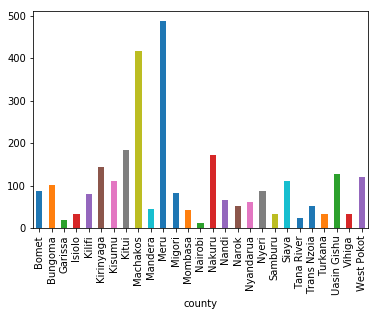

In [50]:
#grouping data by county
df3.groupby('county').population_year_2009.count().plot(kind='bar')

In [53]:
df3.corr()

,objectid,index_,estimated_cost,f2003_2004,f2004_2005,f2005_2006,f2006_2007,f2007_2008,f2008_2009,f2009_2010,total_amount,prox2,y,x,cost,population_year_2009
objectid,1.000000,0.988784,0.051464,-0.021295,0.015981,-0.011195,-0.034180,-0.039668,-0.084720,-0.014037,-0.056490,NaN,0.538695,-0.691423,-0.056490,0.128135
index_,0.988784,1.000000,0.057641,-0.019885,0.021452,-0.009447,-0.028745,-0.028547,-0.077082,-0.011003,-0.045103,NaN,0.507526,-0.714462,-0.045103,0.063374
estimated_cost,0.051464,0.057641,1.000000,0.040136,0.035699,0.081372,0.072235,0.080389,0.028254,0.006973,0.105584,NaN,0.021936,-0.033263,0.105584,-0.016274
f2003_2004,-0.021295,-0.019885,0.040136,1.000000,0.232184,0.093446,0.126122,0.129635,-0.025415,-0.017279,0.294619,NaN,-0.033550,0.045957,0.294619,0.025418
f2004_2005,0.015981,0.021452,0.035699,0.232184,1.000000,0.149410,0.103020,0.065492,-0.007305,-0.020406,0.428539,NaN,0.002142,0.026903,0.428539,0.019413
f2005_2006,-0.011195,-0.009447,0.081372,0.093446,0.149410,1.000000,0.160094,0.093090,-0.010682,0.004992,0.446299,NaN,-0.021299,0.003441,0.446299,0.023061
f2006_2007,-0.034180,-0.028745,0.072235,0.126122,0.103020,0.160094,1.000000,0.272946,0.173500,0.047597,0.663891,NaN,-0.061940,0.062139,0.663891,0.025631
f2007_2008,-0.039668,-0.028547,0.080389,0.129635,0.065492,0.093090,0.272946,1.000000,0.056619,0.008130,0.512213,NaN,-0.061134,0.056728,0.512213,-0.005701
f2008_2009,-0.084720,-0.077082,0.028254,-0.025415,-0.007305,-0.010682,0.173500,0.056619,1.000000,0.089581,0.392306,NaN,-0.076083,0.062496,0.392306,-0.026491
f2009_2010,-0.014037,-0.011003,0.006973,-0.017279,-0.020406,0.004992,0.047597,0.008130,0.089581,1.000000,0.415255,NaN,-0.052650,0.015063,0.415255,0.024856


In [54]:
df4=df3.groupby('county').population_year_2009.agg(['mean','count'])
df4

,mean,count
county,,
Bomet,724186,87
Bungoma,1630934,101
Garissa,623060,20
Isiolo,143294,34
Kilifi,1109735,80
Kirinyaga,528054,144
Kisumu,968909,112
Kitui,1012709,184
Machakos,1098584,418


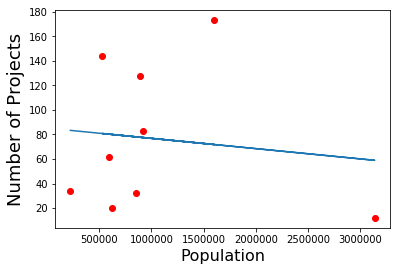

In [55]:

#defining the x and y values
x=df4.iloc[:,:-1].values
y=df4.iloc[:,1].values

#training and test data set
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=1/3,random_state=0)

#implement classifiers
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

reg.fit(x_train,y_train)

#predict

y_predict=reg.predict(x_test)

#graphing

plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,reg.predict(x_train))
plt.ylabel('Number of Projects', fontsize=18)
plt.xlabel('Population', fontsize=16)
plt.show()



In [56]:
#grouping data by county for  computation of cost of project implementation per county
df5=df3.groupby('county').cost.agg(['sum','count'])
df5

,sum,count
county,,
Bomet,43825544,87
Bungoma,92052465,101
Garissa,26595000,20
Isiolo,24946382,34
Kilifi,168527968,80
Kirinyaga,144156040,144
Kisumu,55873639,112
Kitui,195734481,184
Machakos,357561761,418


In [57]:
df5.columns

Index(['sum', 'count'], dtype='object')

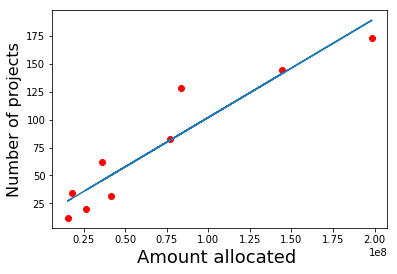

In [58]:

x=df5.iloc[:,:-1].values
y=df5.iloc[:,1].values

#training and test data set
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=1/3,random_state=0)

#implement classifiers
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

#predict

y_predict=reg.predict(x_test)

#graphing

plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,reg.predict(x_train))
plt.xlabel('Amount allocated ', fontsize=18)
plt.ylabel('Number of projects', fontsize=16)
plt.show()




In [142]:
#Project implemenation status per county
df.groupby(['implementation_status','county']).count()['district']


implementation_status  county         
New                    Baringo              2
                       Bungoma              1
                       Busia                5
                       Embu                 4
                       Homa Bay             1
                       Kirinyaga            1
                       Machakos            32
                       Marakwet_Elgeyo      6
                       Migori              21
                       Nandi               11
                       Nyamira              5
                       Nyeri               39
                       Taita Taveta         5
                       Trans Nzoia          4
                       Uasin Gishu         11
complete               Baringo             51
                       Bomet               18
                       Bungoma             33
                       Busia              136
                       Embu                38
                       Garissa           

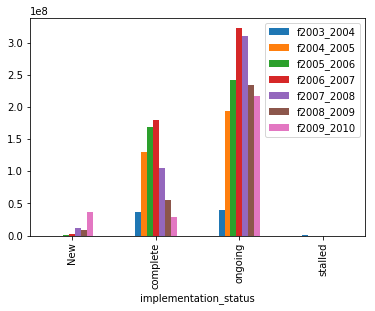

In [62]:
#project implementation per year
df7=df3[['f2003_2004','f2004_2005','f2005_2006','f2006_2007','f2007_2008','f2008_2009','f2009_2010','implementation_status']]
df7.groupby('implementation_status').sum().plot(kind='bar')




In [63]:
#population per county in 2009
df3['population_year_2010'].value_counts()


 1,383,427     488
 1,120,556     418
 1,032,963     184
 1,661,045     173
 536,503       144
 926,369       128
 531,147       120
 989,256       112
 859,992       111
 1,671,707     101
 704,655        88
 750,257        87
 936,431        83
 1,141,917      80
 780,072        66
 605,808        62
 848,232        52
 881,553        52
 1,116,023      46
 966,612        43
 232,009        34
 146,160        34
 568,488        33
 886,193        32
 247,037        23
 677,889        20
 3,257,627      12
Name: population_year_2010, dtype: int64

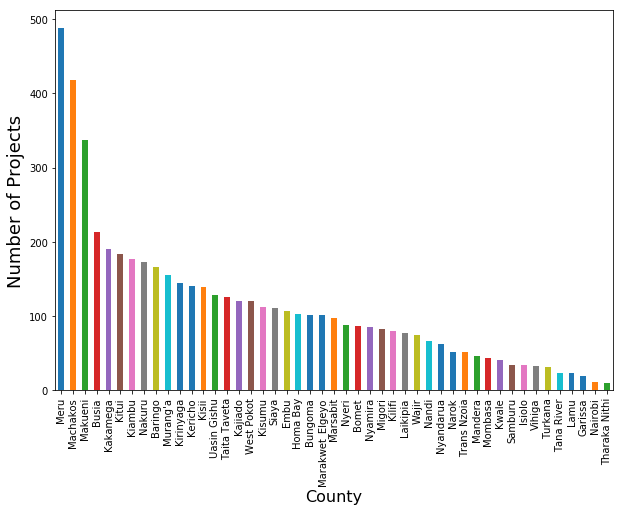

In [64]:
#Number of projects per county
import matplotlib.pyplot as plt
f.plot.bar(figsize=(10,7))
plt.ylabel('Number of Projects', fontsize=18)
plt.xlabel('County', fontsize=16)
plt.show()

In [170]:
ASAL=['Kwale','Kilifi', 'Tana River', 'Lamu', 'Taita Taveta', 'Garissa','Wajir', 'Mandera','Marsabit','Isiolo','Kitui','Machakos','Makueni','Turkana','West Pokot','Samburu','Elgeyo Marakwet','Baringo','Laikipia','Narok', 'Kajiado', 'Nyeri','Tharaka Nithi', 'Meru', 'Embu', 'Migori', 'Homa Bay','Nakuru','Kiambu']
ASAL

['Kwale',
 'Kilifi',
 'Tana River',
 'Lamu',
 'Taita Taveta',
 'Garissa',
 'Wajir',
 'Mandera',
 'Marsabit',
 'Isiolo',
 'Kitui',
 'Machakos',
 'Makueni',
 'Turkana',
 'West Pokot',
 'Samburu',
 'Elgeyo Marakwet',
 'Baringo',
 'Laikipia',
 'Narok',
 'Kajiado',
 'Nyeri',
 'Tharaka Nithi',
 'Meru',
 'Embu',
 'Migori',
 'Homa Bay',
 'Nakuru',
 'Kiambu']

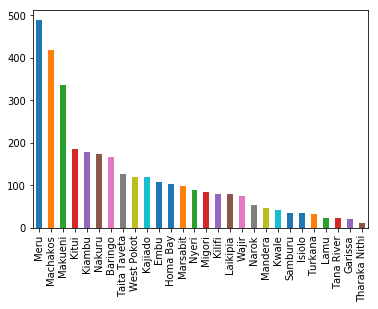

In [194]:
#checking for counties that are classified as ASAL in the county columns
df10 = df[df.county.apply(lambda x: x in ASAL)]
df10.county.value_counts().plot(kind='bar')

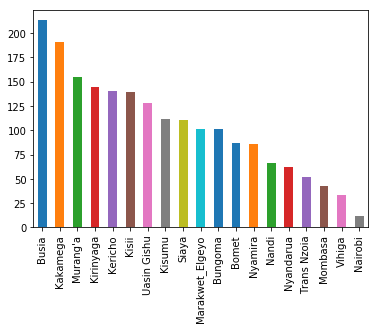

In [180]:
df11 = df[~df.county.apply(lambda x: x in ASAL)]
df11.county.value_counts().plot(kind="bar")

In [188]:
#mean number of projects per county classified ASAL
x=df10.county.value_counts().mean()

In [189]:
#mean number of projects per county no in ASAL classification
y=df11.county.value_counts().mean()

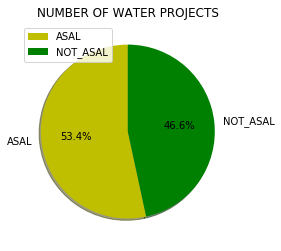

In [226]:
status=[x,y]
lbl=['ASAL','NOT_ASAL']
cols=['y','g']

plt.pie(status,labels=lbl,colors=cols,startangle=90,shadow=True,autopct='%1.1f%%')
plt.title('NUMBER OF WATER PROJECTS')
plt.legend()

In [213]:
#mean of funds allocation in ASAL counties
df10 = df[df.county.apply(lambda x: x in ASAL)]
df10.groupby('county').cost.sum()
x1=statistics.mean(df10.groupby('county').cost.sum())
x1

108340598

In [217]:
#mean of funds allocation in NON ASAL counties
df11.groupby('county').cost.sum()
y1=statistics.mean(df11.groupby('county').cost.sum())
y1

63119113.15789474

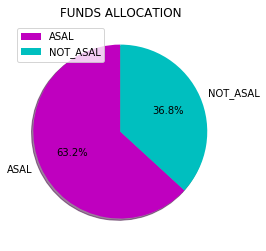

In [225]:
#funds allocation for the water project in ASAL counties and NON ASAL counties
status=[x1,y1]
lbl=['ASAL','NOT_ASAL']
cols=['m','c']

plt.pie(status,labels=lbl,colors=cols,startangle=90,shadow=True,autopct='%1.1f%%')
plt.title("FUNDS ALLOCATION")
plt.legend()